In [14]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
matplotlib.rcParams['figure.dpi'] = 144

# Hypothesis Testing

Hypothesis testing, or Null Hypothesis testing, has developed into the predominant statistical paradigm over the last century or so. It is a vast topic with a lot of history, and has major influence on the shape of statistical methodology today. In this lecture, we will not cover every facet of hypothesis testing, but we will go through the basic assumptions and go through some basic methods with an applied example so you can understand when and how you might use it.

The first thing to understand is the premise of a "Null Hypothesis." The idea here is that it is exceptionally difficult (if not downright impossible) to prove positive that something is true, but it is comparatively much easier to prove that something is false. This is to say, that a good hypothesis is one that can be falsified.

For example, consider the following hypotheses:

1) There is a monster in Loch Ness

2) There is no Loch Ness Monster

These encompass the same idea, but the distinction is very important. Hypothesis 1 cannot be falsified. No matter how many times you go out on the Loch, no matter whether you find scuba gear, or send in a remote controlled submarine, or stand around the Loch with $3.50, if you find no evidence of the Loch Ness Monster, you cannot prove that it isn't there. On the other hand, starting with Hypothesis 2 and the assumption that there is no Loch Ness Monster, all it would take is a single credible sighting and you can reject your hypothesis.

Rejecting the null hypothesis inherently supports the converse of your null hypothesis.

### T - test

Let's move on to a more realistic example. Suppose that you are working for a company, and they want to figure out whether changing the design of their online store will increase revenue. One very common approach is to run an A/B Test, where some users will continue to see the old store design, but some users will see the new store design. You have access to the sales data for both group A and group B, and you want to determine whether there is a difference between them, and if so, which version is more profitable.

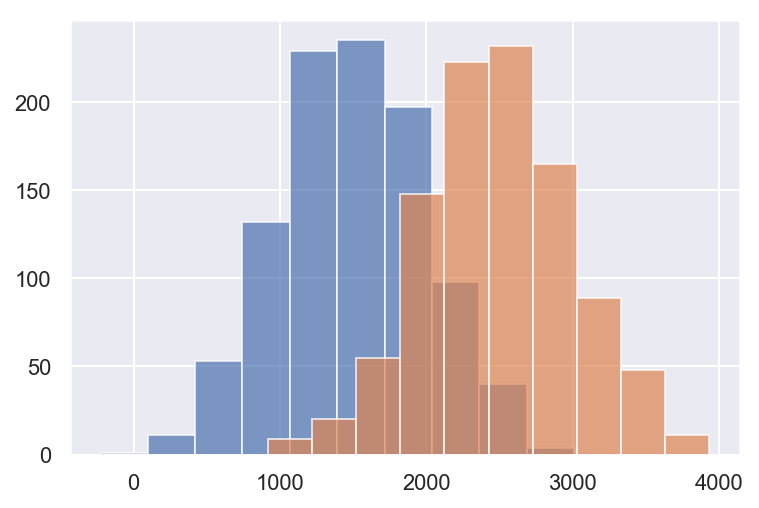

In [102]:
import numpy as np
mu_A = 1500
mu_B = 2500
sig = 500
n = 1000

A = np.random.normal(mu_A, sig, n)
B = np.random.normal(mu_B, sig, n)

plt.hist(A, alpha=0.7)
plt.hist(B, alpha=0.7)

plt.show()

A t-test is a statistical test for determining whether the means of two distributions are different from one another. There are a number of different forumlas and flavors of t-tests depending on the specific circumstances (a t-test can be used to determine if the mean of a distribution or the slope of a regression line is significantly different from a particular value, or it can be used to determine whether the means of two distributions are different, with several formulas to account for whether the variance and sample sizes are the same or different between the distributions).

We will focus on the basic scenario where the sample size and variance is equivalent between both distributions.

The test statistic for a t-test is as follows:

$$t = \frac{\bar{X}_1 - \bar{X}_2}{s_P\sqrt{\frac{2}{n}}}$$

where 

$$s_P = \sqrt{\frac{s^2_{X_1} + s^2_{X_2}}{2}}$$

$s_P$ refers to the pooled estimate of standard deviation for the two distributions together.

This t-statistic represents a a value drawn from the t-distribution. That means that if we took a single distribution and generated two datasets from that distribution and calculated t, and repeated the process many times, these values of t would form a t-distribution. This t-distribution represents the null hypothesis that both samples have the same underlying mean. If the t-statistic for our sample is particularly extreme under the null hypothesis, then it may lead us to reject the null hypothesis and instead believe that the means of the two distributions are *not* the same.

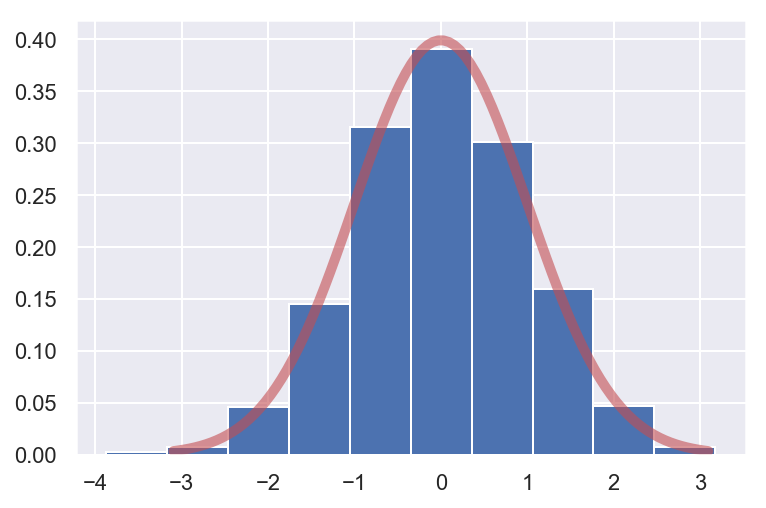

In [101]:
# make a plot showing t-distributions 
# - perhaps generate t-distributions as histograms from random samples of t values for a given DoF
from scipy.stats import t

df = 2*n-2

#t distribution pdf
x = np.linspace(t.ppf(0.001, df),t.ppf(0.999, df), 100)
rv = t(df)

#t distribution random samples
t_1 = np.random.standard_t(df, 1000)

plt.hist(t_1, density=True)
plt.plot(x, t.pdf(x, df),'r-', lw=5, alpha=0.6, label='t pdf')
plt.show()

So how does our example data stack up against this null hypothesis?

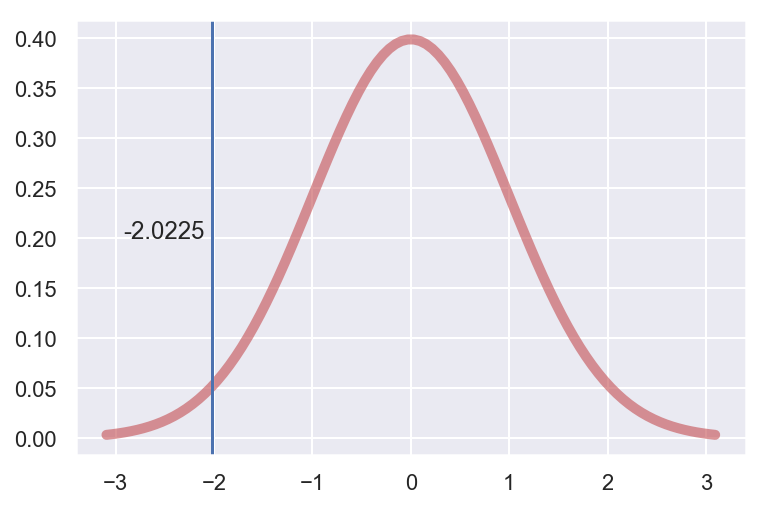

In [100]:
t_stat = (np.mean(A) - np.mean(B))/np.sqrt(np.mean((np.var(A), np.var(B))))

x = np.linspace(t.ppf(0.001, df),t.ppf(0.999, df), 100)
rv = t(df)

plt.plot(x, t.pdf(x, df),'r-', lw=5, alpha=0.6, label='t pdf')
plt.axvline(x=t_stat)
plt.text(t_stat - 0.9, 0.2, str(round(t_stat, 4)))
plt.show()

### p-values

How do we determine just how extreme a t-value is? 
This is relatively simple. If the null hypothesis is two-tailed (meaning that it could be falsified by either $\mu_A < \mu_B$ or by $\mu_A > \mu_B$), then we find the total area under the distribution as or more extreme than our t value.

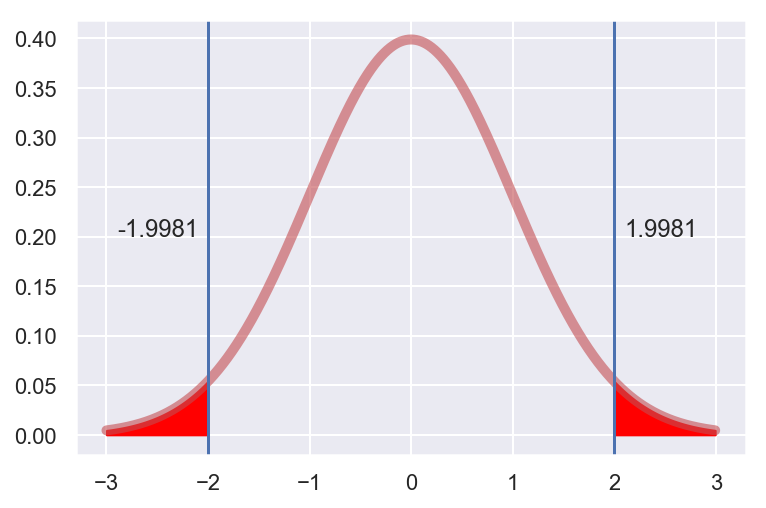

0.045837931941798325

In [105]:
t_stat = (np.mean(A) - np.mean(B))/np.sqrt(np.mean((np.var(A), np.var(B))))

x = np.arange(-3,3,.005)
pdf = t.pdf(x, df)

plt.plot(x, pdf,'r-', lw=5, alpha=0.6, label='t pdf')
plt.axvline(x=t_stat)
plt.axvline(x=-t_stat)
plt.text(t_stat - 0.9, 0.2, str(round(t_stat, 4)))
plt.text(-t_stat + 0.1, 0.2, str(round(-t_stat, 4)))
plt.fill_between(x[x<=t_stat], 0*x[x<=t_stat], pdf[x<=t_stat], color = "red")
plt.fill_between(x[x>=(-t_stat)], 0*x[x>=(-t_stat)], pdf[x>=(-t_stat)], color = "red")

plt.show()

p_value = t.cdf(-abs(t_stat), df) * 2
p_value

This value that we've calculated is the probability that our data (or any other equally or more extreme data) arose under the assumption that both distributions have the same mean. This probability is called a p-value.

At what point is a result sufficiently unlikely to reject the null hypothesis?
Ultimately, this is an arbitrary decision based on an understanding of the risk of being wrong, and in what way. There are two types of error - False Positives (Type I) and False Negatives (Type II). In many disciplines, there is a rule of thumb to use a 5% Type I error rate, which means that generally results with a p-value lower than 0.05 are considered to be "statistically significant," and indicate that the null hypothesis can be rejected. This also means that it should be expected that 5% of these analyses are actually False Positives.

### Precision and Recall

# revise and practice

In carrying out your own analyses, these error rates are very important to consider, and lead into the concepts of Precision and Recall. Precision is a metric based on minimizing the False Positive rate, and is calculated as $\frac{TruePositives}{TruePositives + FalsePositives}$. Note that this runs the risk of being overly exclusive, because False Negatives are not penalized.

Recall on the other hand, is based on maximizing the True Positive rate, but risks being overly inclusive, because False Positives are not penalized. It is calculated as $\frac{TruePositives}{TruePositives + FalseNegatives}$.

Whether you prioritize Precision, Recall, or some combination of both, will depend on your particular task, and the degree to which you care about False Positives vs False Negatives. For example, if you are screening for cancer, Recall is much more important than Precision, whereas if you are evaluating job applicants, Precision is much more important than Recall. Think about projects that you've done or questions that you have, and consider whether Precision or Recall is more important. Sometimes we do simply want to find a balance between them, but the relative importance of these error rates will shape the way that we build our models.

# Bayesian Inference

All of the above lies within the paradigm of Frequentist statistics. This is based in the philosophical assumption that probability represents the frequency of an occurence - for example, if you flip a fair coin infinite times, it should come up on heads 50% of the time, and therefore the probability of getting heads when you flip a coin is 50%. One of the major consequences of this philosophy is that we assume that a hypothesis is correct, and test the probability of getting our data under that assumption. If we want to estimate the value of a parameter, we end up with a point estimate of that parameter with some error bars repesenting our confidence in the true value of that parameter.

By contrast, there is another strain of statistical philosophy called Bayesian Statistics. According to Bayesian statistics, probability instead represents the strength of belief in a hypothesis. Under this paradigm, instead of assuming a hypothesis is true and then using the probability of the data to either reject or fail to reject our assumptions, we instead assume that our data are true, and estimate the probability of our hypothesis. This results in a Posterior Probability in the form of a whole distribution, giving us a much more nuanced understanding of the likelihood of our estimates.

The guiding principle of Bayesian Statistics is called Bayes' Theorem or Bayes' Rule.

$$ P(Hypothesis|Data) = \frac{P(Hypothesis) * P(Data|Hypothesis)}{P(Data)} $$

If we want to know the probability of our hypothesis given some data, all we need to do is fill in the parts of this formula.

$P(Hypothesis)$ is called the prior probability, and represents our initial belief regarding the outcome of the analysis. This might be completely uninformative, but often is some kind of broad distribution that can incorporate information from past results, or philosophical assumptions due to the nature of the data, while still allowing the data most of the control over the Posterior Probability.

$P(Data|Hypothsis)$ is the likelihood function. This will be familiar to anyone with frequentist statisical training. This represents the probability of our data, assuming that our hypothesis is correct. Given data, this is easy to calculate.

The real problem that will arise is from $P(Data)$. This is the marginal likelihood of the data - the probability of the data under all possible hypotheses. Or, in other words, $\int \left(P(Hypothesis) * P(Data|Hypothesis) \right)\delta Hypothesis$.

### Conjugate Priors

There are two ways to deal with this. One, is that with specific parametric choices for the Prior in conjunction with the Likelihood, this integral will be analytically solveable, and result in a parametric Posterior of the same type of distribution as the Prior. These are called conjugate priors, and can be quite useful.

In [4]:
# Example with A/B test and conjugate priors

### Posterior Sampling

The other way to solve this problem, is to skip the integration altogether. While it may be impossible to practically calculate the denominator of the Posterior, if we compare two different estimates, we can easily calculate the ratio of their probabilities, because the denominators will cancel each other out. This means that we can determine which of these is more likely, and this has led to a number of different methods for inferring the posterior.

One of the most common of these methods is called Markhov Chain Monte Carlo (MCMC). Without getting into too much detail, this basically works by proposing values for each of the model parameters, and then calculating the likelihood ratio of this new model to the previous model. If the new model is better, then it is accepted and becomes the model that new proposals will be compared to. If the new model is worse, then it will probably be rejected. Over time, with many thousands or millions of model proposals, the chain explores the parameter space and ultimately the accepted values will approximate the Posterior Distribution.

In [ ]:
# Example with MCMC sampling